In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy import units as u
from astropy.coordinates import SkyCoord as scr
import seaborn as sns
import scipy as sp

# OBJECTIVES

Split the data energy wise 
## (0.3-1 TeV, 1-3 TeV, 3-10 TeV)

 Redo both sets of experiments (Task 1 and Task 2)

For method 2 (when counting no of matches within the neutrino error circle) instead of
counting the background events by looking at the no of neutrino-MSP pairs within the same cos(error region) offset by 5 degrees,

    Follow the same method as in        https://arxiv.org/pdf/2112.11375v1.pdf      which is briefly summarized below

        1. Generate a synthetic catalog of MSPs uniformly distributed in the same RA and DEC range as observed population

        2, Count no of coincidences  within neutrino error circle for the synthetic catalog in (1). 

        3. Repeat step (1) and (2) 100 times and take the average.

## IMPORTING DATA



### SPLITTING THE DATA

In [2]:
path = "/media/darkwake/VIB2/Project-IceCube/icecube_10year_ps/events"
filenames = ["IC40_exp.csv", "IC59_exp.csv","IC79_exp.csv", "IC86_I_exp.csv", "IC86_II_exp.csv",
 "IC86_III_exp.csv", "IC86_IV_exp.csv", "IC86_V_exp.csv", "IC86_VI_exp.csv", "IC86_VII_exp.csv"]
file = filenames[0]
f = open(os.path.join(path, file), 'r')

lines = f.readlines()
column=lines[0].split()
column.pop(0)
content = []
for file in filenames:
    f = open(os.path.join(path, file), 'r')
    lines = f.readlines()
    for line in lines[1:]:
        content.append(line.split())
    f.close()
icdata = pd.DataFrame(content, columns=column)
icdata['log10(E/GeV)'] = [float(i) for i in icdata['log10(E/GeV)']]

In [3]:
icdata = icdata.sort_values('log10(E/GeV)')
icdata = icdata.reset_index()
icdata = icdata.drop('index', axis=1)

In [4]:
icdata

MJD[days]  log10(E/GeV) AngErr[deg]  RA[deg] Dec[deg]  \
0        57406.38557611          1.05       14.40   36.393   40.665   
1        57741.89209354          1.07        9.90   46.209   31.837   
2        56247.41003029          1.11        7.35  204.188   48.589   
3        57776.35241772          1.11       10.81  273.928   32.625   
4        57821.93460663          1.16       12.40  159.925   35.709   
...                 ...           ...         ...      ...      ...   
1134445  57850.41489986          7.00        1.48  299.091  -19.242   
1134446  56616.28975047          7.01        1.24  300.952  -48.575   
1134447  57741.31320782          7.04        3.27  226.680   -7.559   
1134448  58099.46879008          7.26        3.32  317.013  -34.929   
1134449  57435.11358644          7.53        3.78  149.036  -11.513   

        Azimuth[deg] Zenith[deg]  
0            310.371     130.743  
1             93.586     121.900  
2             89.178     138.519  
3             65.663     122.631  
4             74.086     125.616  
...              ...         ...  
1134445      135.893      70.801  
1134446      312.569      41.469  
1134447       64.185      82.379  
1134448       22.825      55.146  
1134449      128.179      78.402  

[1134450 rows x 7 columns]

In [5]:
icpartitions = (np.log10(300), np.log10(1000), np.log10(3000), np.log10(10000))
lwall = [0]
rwall = []
for i in range(0,len(icpartitions)):
    lwall.append(min(icdata[icdata['log10(E/GeV)'] > icpartitions[i]].index))
    rwall.append(max(icdata[icdata['log10(E/GeV)'] <= icpartitions[i]].index))
lwall.pop(-1)

761789

In [6]:
lwall

[0, 7056, 338985, 676197]

In [7]:
rwall

[7055, 338984, 676196, 761788]

## Method 1A with Splits

In [8]:
icra = [float(i) for i in icdata['RA[deg]']]
icdec = [float(i) for i in icdata['Dec[deg]']]
gac = scr(ra = icra * u.degree, dec = icdec * u.degree, frame= 'icrs')
gac = gac.galactic

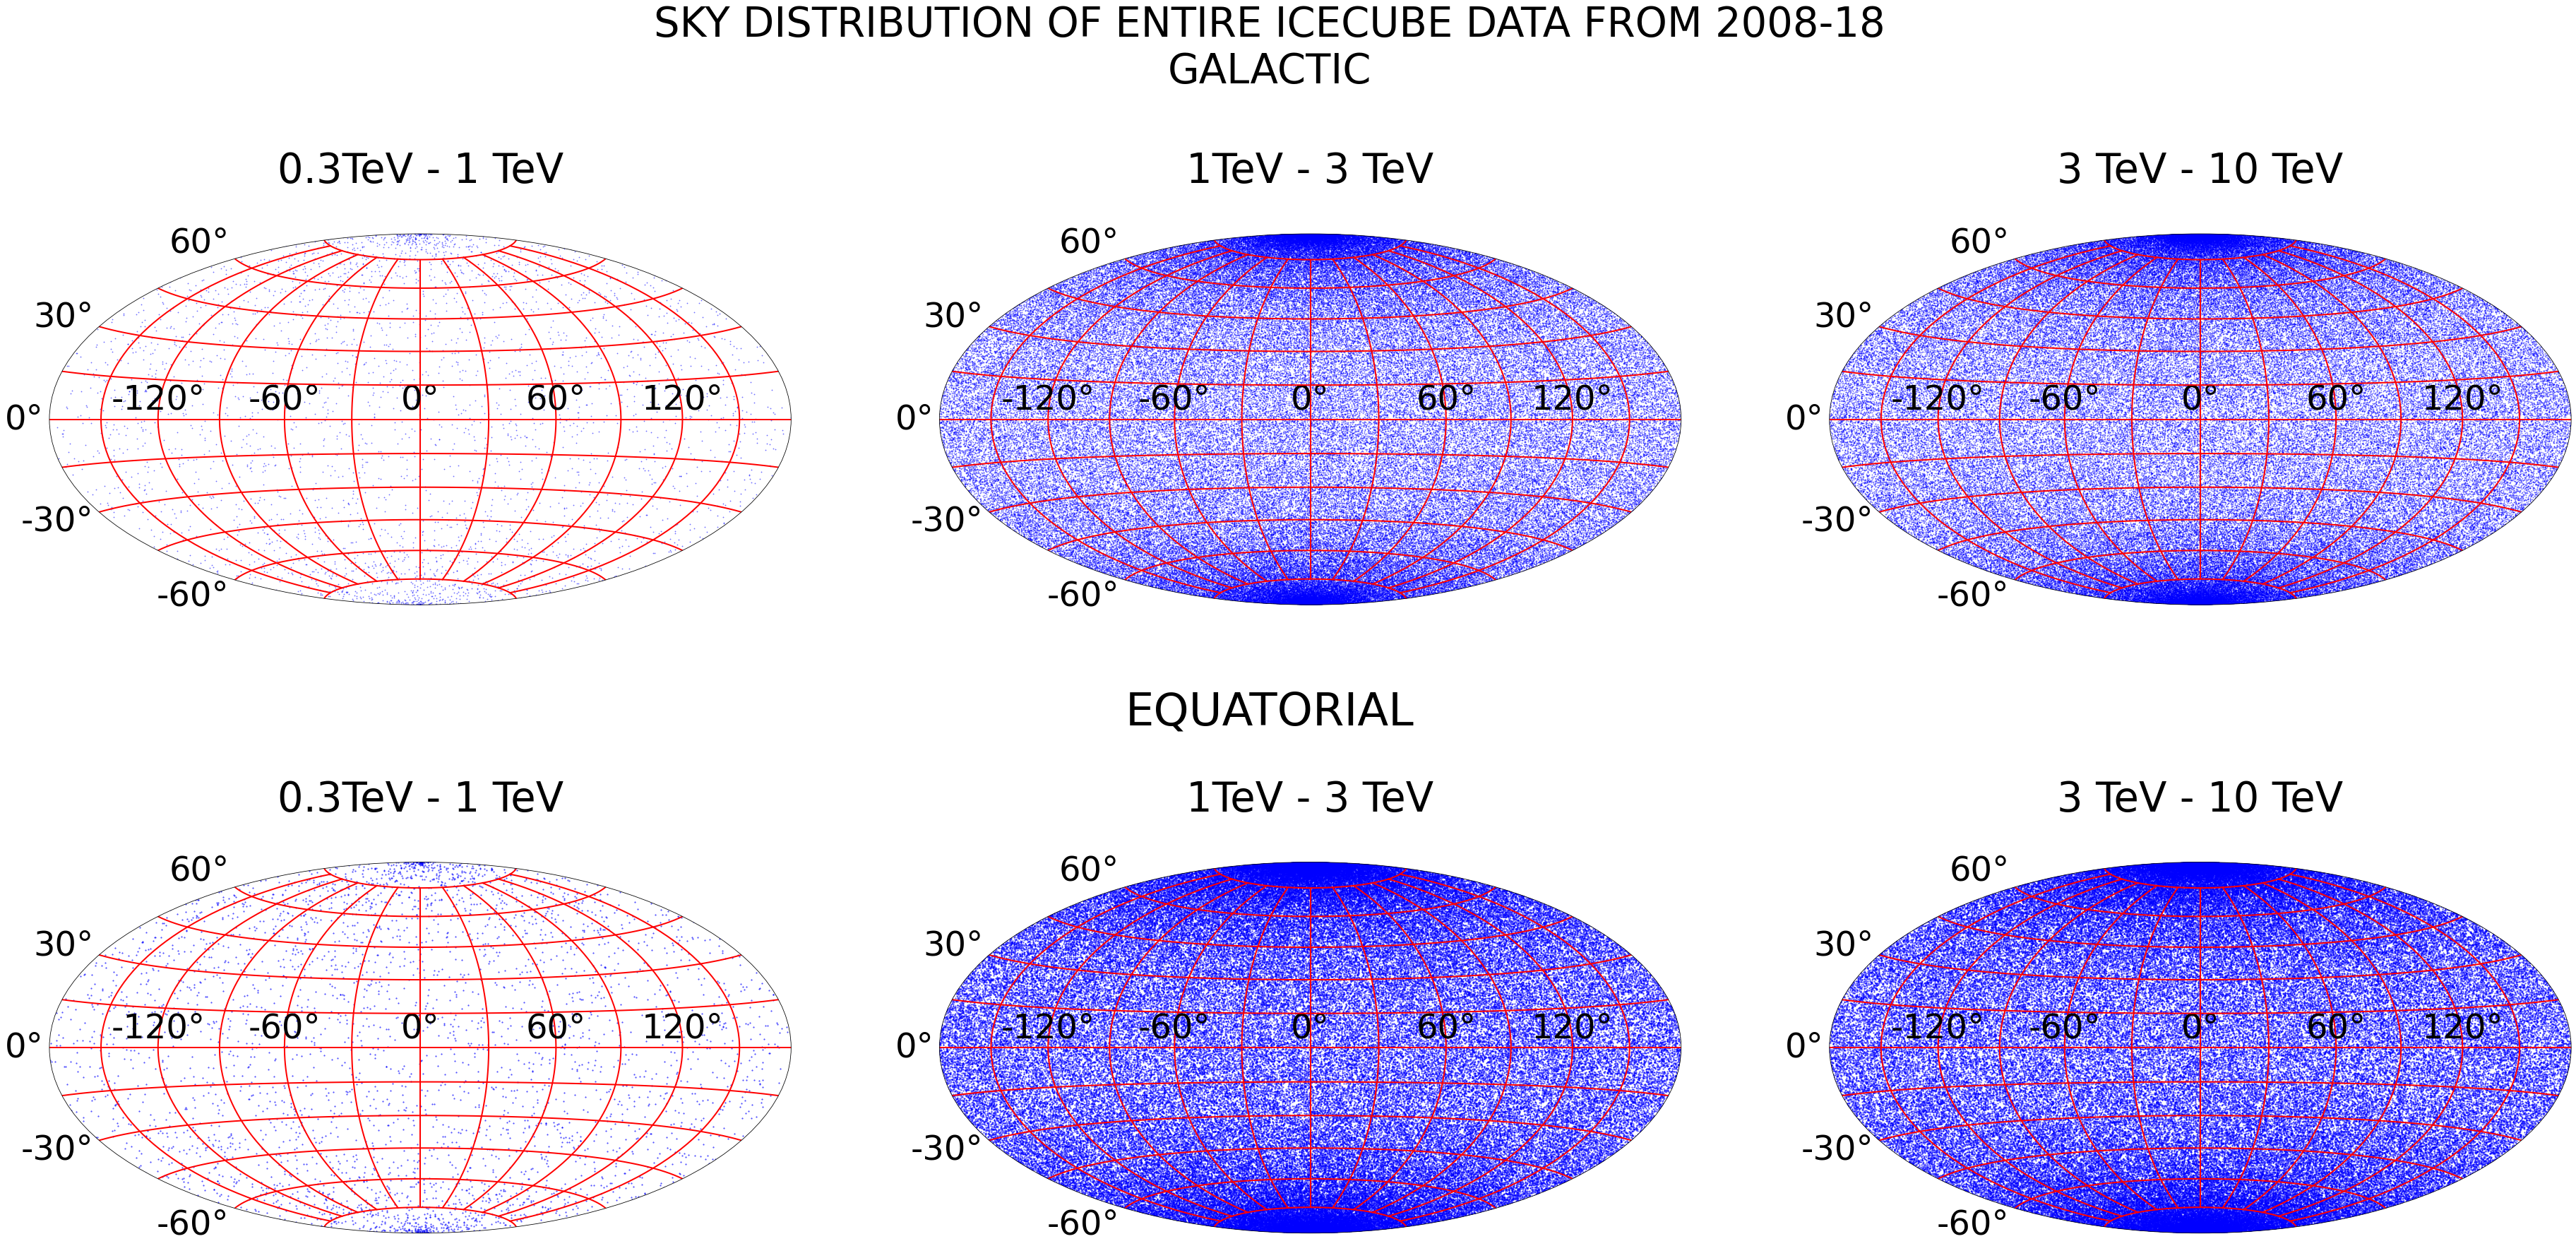

In [9]:
#GALACTIC COORDINATES
fig = plt.figure(figsize=(64,30))
plt.rcParams.update({'font.size': 48})
titles = ['0.3TeV - 1 TeV', '1TeV - 3 TeV', '3 TeV - 10 TeV']
fig.suptitle("SKY DISTRIBUTION OF ENTIRE ICECUBE DATA FROM 2008-18\nGALACTIC")
for i in range(0,3):
    ax1 = plt.subplot(231 + i,projection='hammer')
    ax1.scatter(gac.l[lwall[i]:rwall[i]], gac.b[lwall[i]:rwall[i]], marker='*',color='b', s = 0.95,alpha=0.5)
    ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
    ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
    ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
    ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
    ax1.grid(True, which='both', color='r', lw=2)
    ax1.set_title(titles[i] + '\n')
fig.text(0.5, 0.5, 'EQUATORIAL\n', horizontalalignment='center', verticalalignment='center', fontsize=64)
for i in range(0,3):
    ax1 = plt.subplot(234 + i,projection='hammer')
    ax1.scatter(icra[lwall[i]:rwall[i]], icdec[lwall[i]:rwall[i]], marker='*',color='b', s = 2.5,alpha=0.5)
    ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
    ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
    ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
    ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
    ax1.grid(True, which='both', color='r', lw=2)
    ax1.set_title(titles[i] + '\n')
plt.show()fig.text(0.5, 0.5, 'EQUATORIAL\n', horizontalalignment='center', verticalalignment='center', fontsize=64)

## METHOD 1B with Splits

In [10]:
e = [float(i) for i in icdata['log10(E/GeV)']]
e = [float(i) for i in icdata['log10(E/GeV)']]

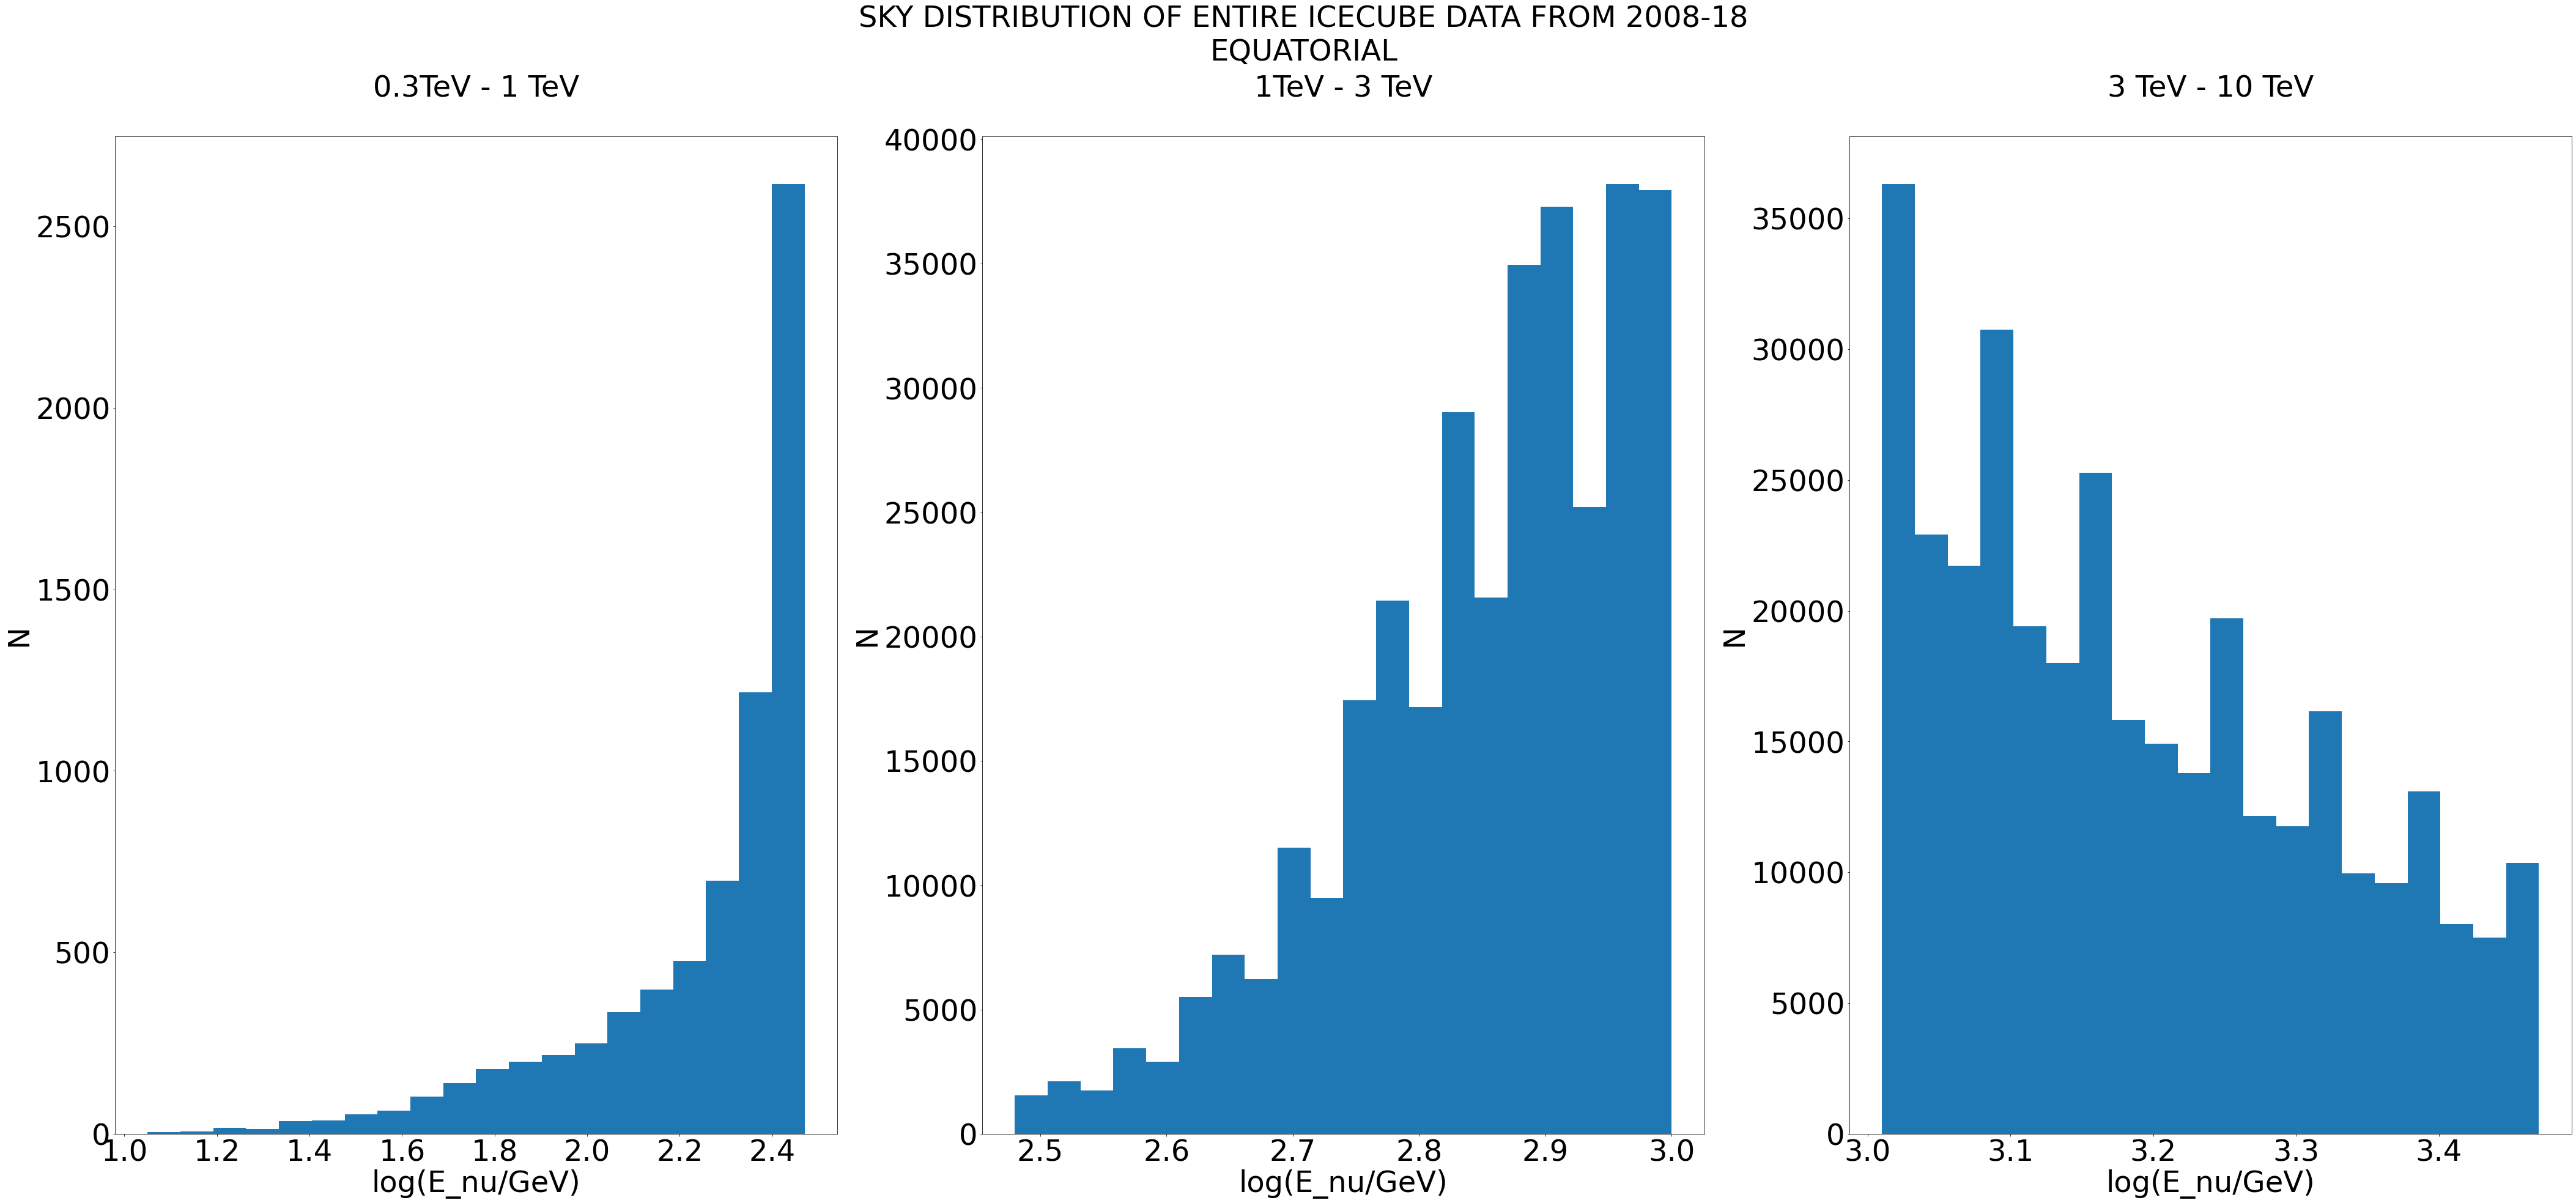

In [11]:
#fig = plt.figure(figsize=(72,30))
#gs = fig.add_gridspec(1,3)
fig, ax = plt.subplots(1, 3,  figsize=(72,30))
#ax = gs.subplots(sharex=True, sharey=True)
plt.rcParams.update({'font.size': 40})
titles = ['0.3TeV - 1 TeV', '1TeV - 3 TeV', '3 TeV - 10 TeV']
fig.suptitle("SKY DISTRIBUTION OF ENTIRE ICECUBE DATA FROM 2008-18\nEQUATORIAL\n")
plt.setp(ax,xlabel="log(E_nu/GeV)")
plt.setp(ax,ylabel="N") 
for i in range(0,3):
    #ax[i].semilogx()
    ax[i].hist(e[lwall[i]:rwall[i]], bins=20)
    #sns.histplot(e[lwall[i]:rwall[i]], bins=20, ax=ax[i], kde=True, line_kws={'color': 'green', 'lw': 8})
    ax[i].set_title(titles[i] + '\n')
plt.show()

## TASK 1C

In [12]:
#IMPORTING AND CLEANING MSPDATA
f = open("/media/darkwake/VIB2/Project-IceCube/10milsecpsr.txt", 'r')
lines = f.readlines()

content=[]
column=lines[3].split()

for line in lines[:]:
    content.append(line.split())

#the INITAL DATABASE IS CLUTTERED SO WE REMOVE THE NULL COLUMNS AND OTHER CLUTTER
mspdata = pd.DataFrame(content).drop(range(0,6)).dropna().drop([2,6,8,10,11,13,14], axis=1)
f.close()
line = []
lines = []

mspdata.columns = column
column = []
content=[]
mspdata.dropna(inplace=True)
mspdata = mspdata.reset_index()
mspdata = mspdata.drop(["index", "#"], axis=1)

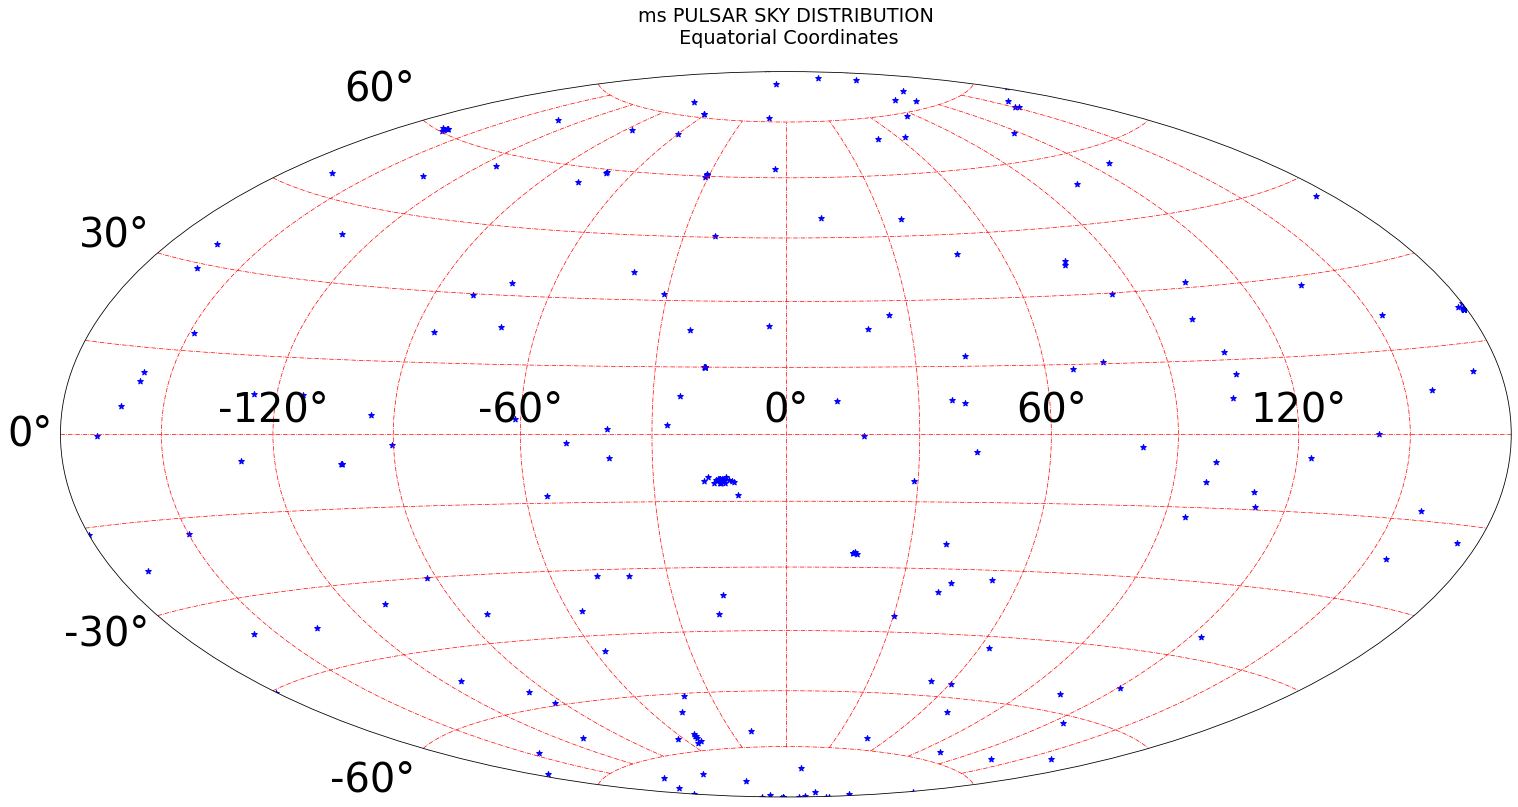

In [13]:
fig = plt.figure(figsize=(26,16))
ax1 = plt.subplot(111,projection='hammer')
plt.rcParams.update({'font.size': 16})
ax1.scatter([float(i) for i in mspdata['RAJD']], [float(i) for i in mspdata['DECJD']], marker='*',color='b')
ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax1.grid(True, which='both', color='r', lw=0.7, ls = '-.')
ax1.set_title('ms PULSAR SKY DISTRIBUTION\n Equatorial Coordinates\n')
plt.show()

# TASK 2

For method 2 (when counting no of matches within the neutrino error circle) instead of
counting the background events by looking at the no of neutrino-MSP pairs within the same cos(error region) offset by 5 degrees,

    Follow the same method as in        https://arxiv.org/pdf/2112.11375v1.pdf      which is briefly summarized below

        1. Generate a synthetic catalog of MSPs uniformly distributed in the same RA and DEC range as observed population

        2, Count no of coincidences  within neutrino error circle for the synthetic catalog in (1). 

        3. Repeat step (1) and (2) 100 times and take the average.

In [14]:
ic = [icdata[lwall[i]:rwall[i] + 1] for i in range(len(lwall))]

In [15]:
ic.pop(0)
len(ic)

3

In [16]:
for i in range(3):
    ic[i] = ic[i].reset_index()
    ic[i] = ic[i].rename(columns={'index': 'oindex'})

In [17]:
extensions = [441 - len(ic[i])%441 for i in range(3)]

In [35]:
sum(extensions)

700

In [18]:
icra = [[float(i) for i in ic[j]['RA[deg]']] for j in range(3)]
icdec = [[float(i) for i in ic[j]['Dec[deg]']] for j in range(3)]
icang = [[float(i) for i in ic[j]['AngErr[deg]']] for j in range(3)]

In [19]:
for i in range(3):
    icra[i].extend([0]*extensions[i])
    icdec[i].extend([0]*extensions[i])

## Task 2A

CONVERT RA, DEC TO SUITABLE DATA_VECTORS FROM THE DATA                                                                          

DIVIDE ICECUBE DATA TO 441 LENGTH VECTORS TO MATCH MSPSRDATA VECTOR SIZE                                                        

CIRCULARLY ITERATE THROUGH ICECUBE VECTORS TO GET SPACE ANGLES AT 441 x 441 ANGLES PER ITERATION FOR 2373 ITERATIONS            

PLOT THE RESULTS IN A GRAPH

In [20]:
msra = [float(i) for i in mspdata['RAJD']]
msdec = [float(i) for i in mspdata['DECJD']]
cos5 = np.cos(np.deg2rad(5))

mssra = sp.stats.norm(min(msra), max(msra))
mssdec = [np.random.uniform(min(msdec), max(msdec)) for i in range(441)]

### GENERATING SYNTHETIC CATALOGUE

In [21]:
quantile = np.arange (min(msra), max(msra), (max(msra) - min(msra))/441) 
msra2 = sp.stats.norm.pdf(min(msra), max(msra), quantile)
quantile = np.arange (min(msdec), max(msdec), (max(msdec) - min(msdec))/441) 
msdec2 = sp.stats.norm.pdf(min(msdec), max(msdec), quantile)

HAVERSINE FUNCTION TO CALCULATE SPACE ANGLE

In [22]:
#FOR 2A, 2B
def hvovec(lon1, lat1, lon2, lat2):

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    #dlat = np.subtract(lat2, lat1)

    a = np.add(np.multiply(np.sin(lat1), np.sin(lat2)), np.multiply(np.multiply(np.cos(lat1), np.cos(lat2)), np.cos(dlon)))

    return (np.rad2deg(np.arccos(a)), a)
    #return in RADIANS

In [32]:
ft2a = []
ft2b = []
for x in range(3):
    st2a = []
    st2b = []
    lg = int(len(icra[x])/len(msra))
    p = len(msra)    
    for k in range(lg):
        ilo = icra[x][k * p  :p * k + p]
        ila = icdec[x][k * p  :p * k + p]
        lo =[]
        la = []
        #t2a = []
        #t2b = []
        for j in range(p):#441
            lo = [msra[(i + j)%p] for i in range(0,p)]
            la = [msdec[(i + j)%p] for i in range(0,p)]
            hvs = hvovec(ilo, ila, lo, la)       #2A, 2C
            st2a.append(hvs[0])
            st2b.append(hvs[1])
            if k == lg - 1:
                #st2a.append(hvs[0][:-extensions[x]])
                #st2b.append(hvs[1][:-extensions[x]])
                st2a[-1][extensions[x]:] = None
                st2b[-1][extensions[x]:] = None
            #else:    
                #st2a.append(hvs[0])
                #st2b.append(hvs[1])
        #st2a.append(t2a)
        #st2b.append(t2b)
    l = np.ravel(st2a)
    m = np.ravel(st2b)
    ft2a.append(l)
    ft2b.append(m)

In [33]:
sft2a = []
sft2b = []
bbb = []
for x in range(3):
    st2a = []
    st2b = []
    aaa = []
    lg = int(len(icra[x])/len(msra2))
    p = len(msra2)    
    for k in range(lg):
        ilo = icra[x][k * p  :p * k + p]
        ila = icdec[x][k * p  :p * k + p]
        lo =[]
        la = []
        #t2a = []
        #t2b = []
        for j in range(p):#441
            lo = [msra2[(i + j)%p] for i in range(0,p)]
            la = [msdec2[(i + j)%p] for i in range(0,p)]
            hvs = hvovec(ilo, ila, lo, la)       #2A, 2C
            st2a.append(hvs[0])
            st2b.append(hvs[1])
            if k == lg - 1:
                #st2a.append(hvs[0][:-extensions[x]])
                #st2b.append(hvs[1][:-extensions[x]])
                st2a[-1][extensions[x]:] = None
                st2b[-1][extensions[x]:] = None
            #else:    
                #st2a.append(hvs[0])
                #st2b.append(hvs[1])
        #st2a.append(t2a)
        #st2b.append(t2b)
        
    aaa = np.ravel(aaa)
    bbb.append(aaa)
    l = np.ravel(st2a)
    m = np.ravel(st2b)
    sft2a.append(l)
    sft2b.append(m)

In [31]:
k * p + l

331929

In [ ]:
t2a = [list(i) for i in ft2a]
t2b = [list(i) for i in ft2b]

## Task 2A - Output

### SPACE ANGLE DISTRIBUTION

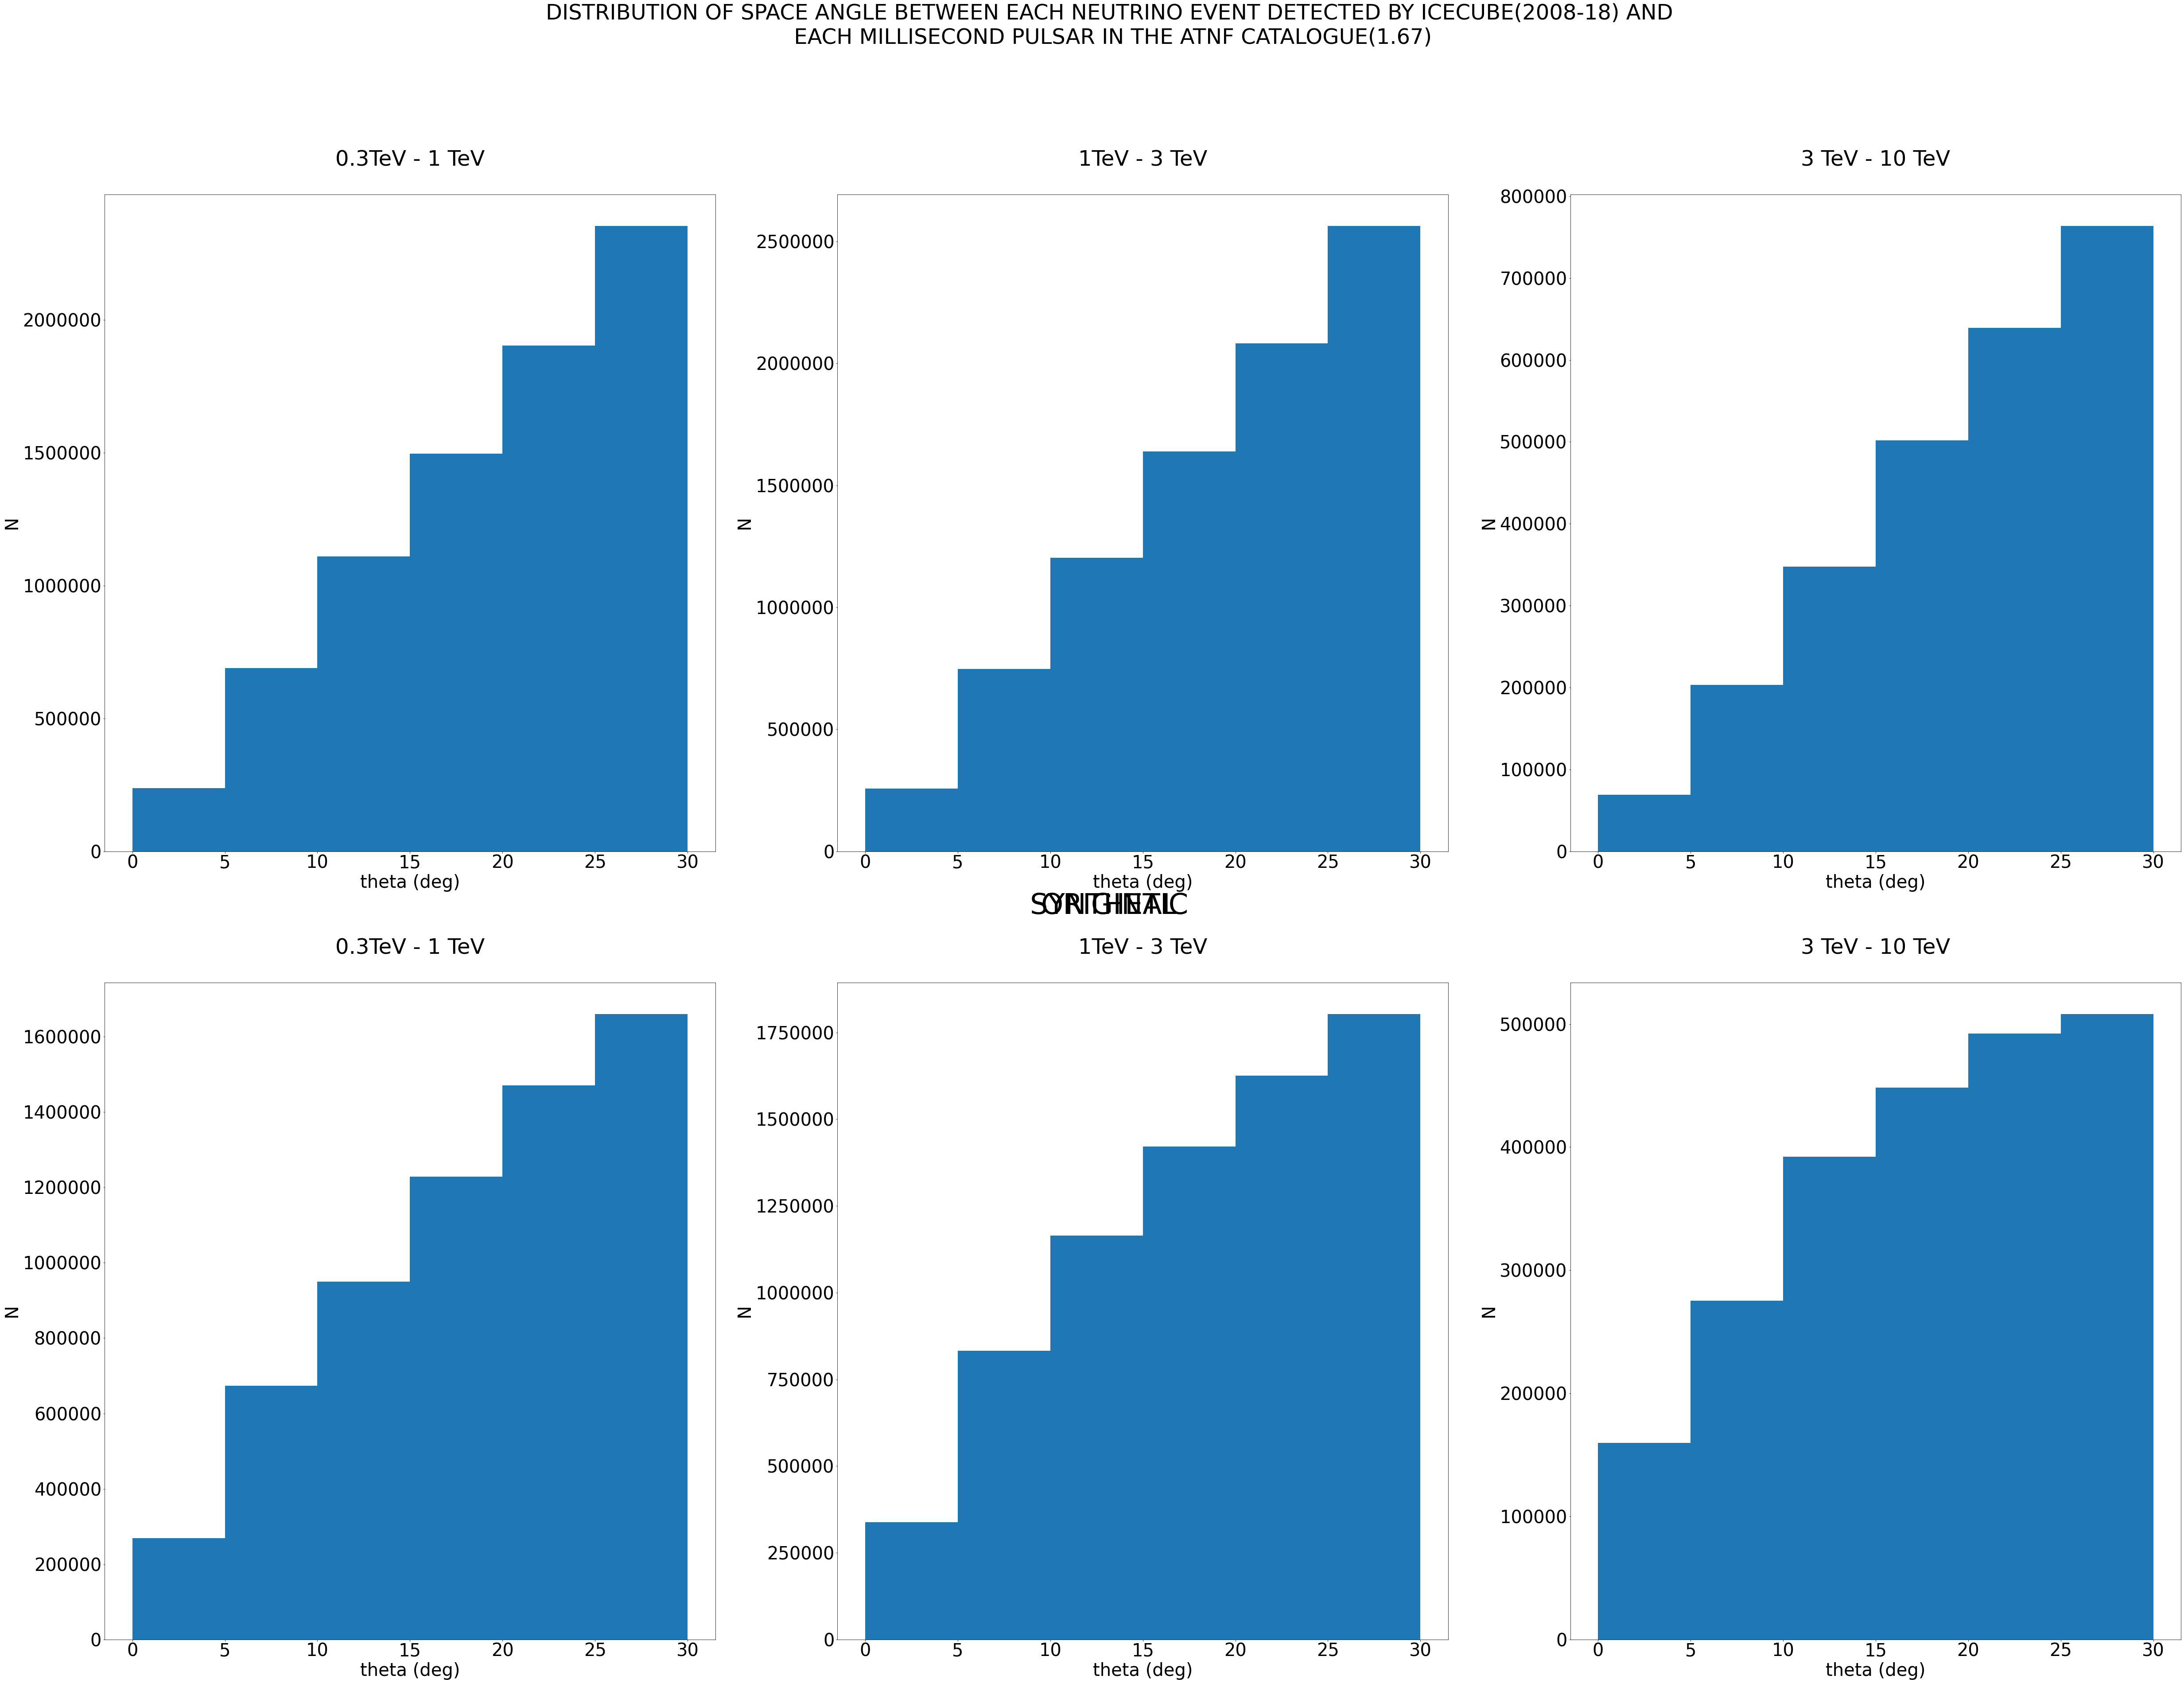

In [37]:
fig, ax = plt.subplots(2, 3,  figsize=(84,60))
plt.rcParams.update({'font.size': 40})
titles = ['0.3TeV - 1 TeV', '1TeV - 3 TeV', '3 TeV - 10 TeV']
plt.setp(ax,xlabel="theta (deg)")
plt.setp(ax,ylabel="N")
plt.suptitle('DISTRIBUTION OF SPACE ANGLE BETWEEN EACH NEUTRINO EVENT DETECTED BY ICECUBE(2008-18) AND\n EACH MILLISECOND PULSAR IN THE ATNF CATALOGUE(1.67)')
fig.text(0.5, 0.5, 'ORIGINAL\n', horizontalalignment='center', verticalalignment='center', fontsize=64)
nbins = np.arange(0, 35, 5)
for x in range(3):
    ax[0,x].ticklabel_format(useOffset=False, style='plain', axis='y')
    ax[0,x].hist(ft2a[x], bins= nbins)
    ax[0,x].set_title(titles[x] + '\n')
fig.text(0.5, 0.5, '\n\nSYNTHETIC\n', horizontalalignment='center', verticalalignment='center', fontsize=64)
for x in range(3):
    ax[1,x].ticklabel_format(useOffset=False, style='plain', axis='y')
    ax[1,x].hist(sft2a[x], bins= nbins)
    ax[1,x].set_title(titles[x] + '\n')
    #ax.grid(True, which="both")
plt.show()

## Task 2B - Output

### COSINE(SPACE ANGLE) DISTRIBUTION

Bin the cos(theta) into 6 bins between cos(7.35) and cos(0)

Mean of the first 5 bins is the BACKGROUND

the LAST bin (ending with cos(0) is the SIGNAL

In [38]:
nbins = np.linspace(np.cos(np.radians(7.35)), np.cos(0),  7)

freq = [np.histogram(ft2b[i], nbins)[0] for i in range(3)]

freq1 = [freq[i][:-1]for i in range(3)]
midpt = [(nbins[i+1] + nbins[i])/2.0 for i in range(len(nbins) - 1)]
midpt = np.array(midpt[:-1])
mean = [np.dot(freq1[i], midpt)/float(np.sum(midpt)) for i in range(3)]
signal = [freq[i][-1] for i in range(3)]

In [ ]:
freq2 = [np.histogram(sft2b[i], nbins)[0] for i in range(3)]

freq12 = [freq2[i][:-1]for i in range(3)]
midpt2 = [(nbins[i+1] + nbins[i])/2.0 for i in range(len(nbins) - 1)]
midpt2 = np.array(midpt2[:-1])
mean2= [np.dot(freq12[i], midpt2)/float(np.sum(midpt2)) for i in range(3)]
signal2 = [freq2[i][-1] for i in range(3)]

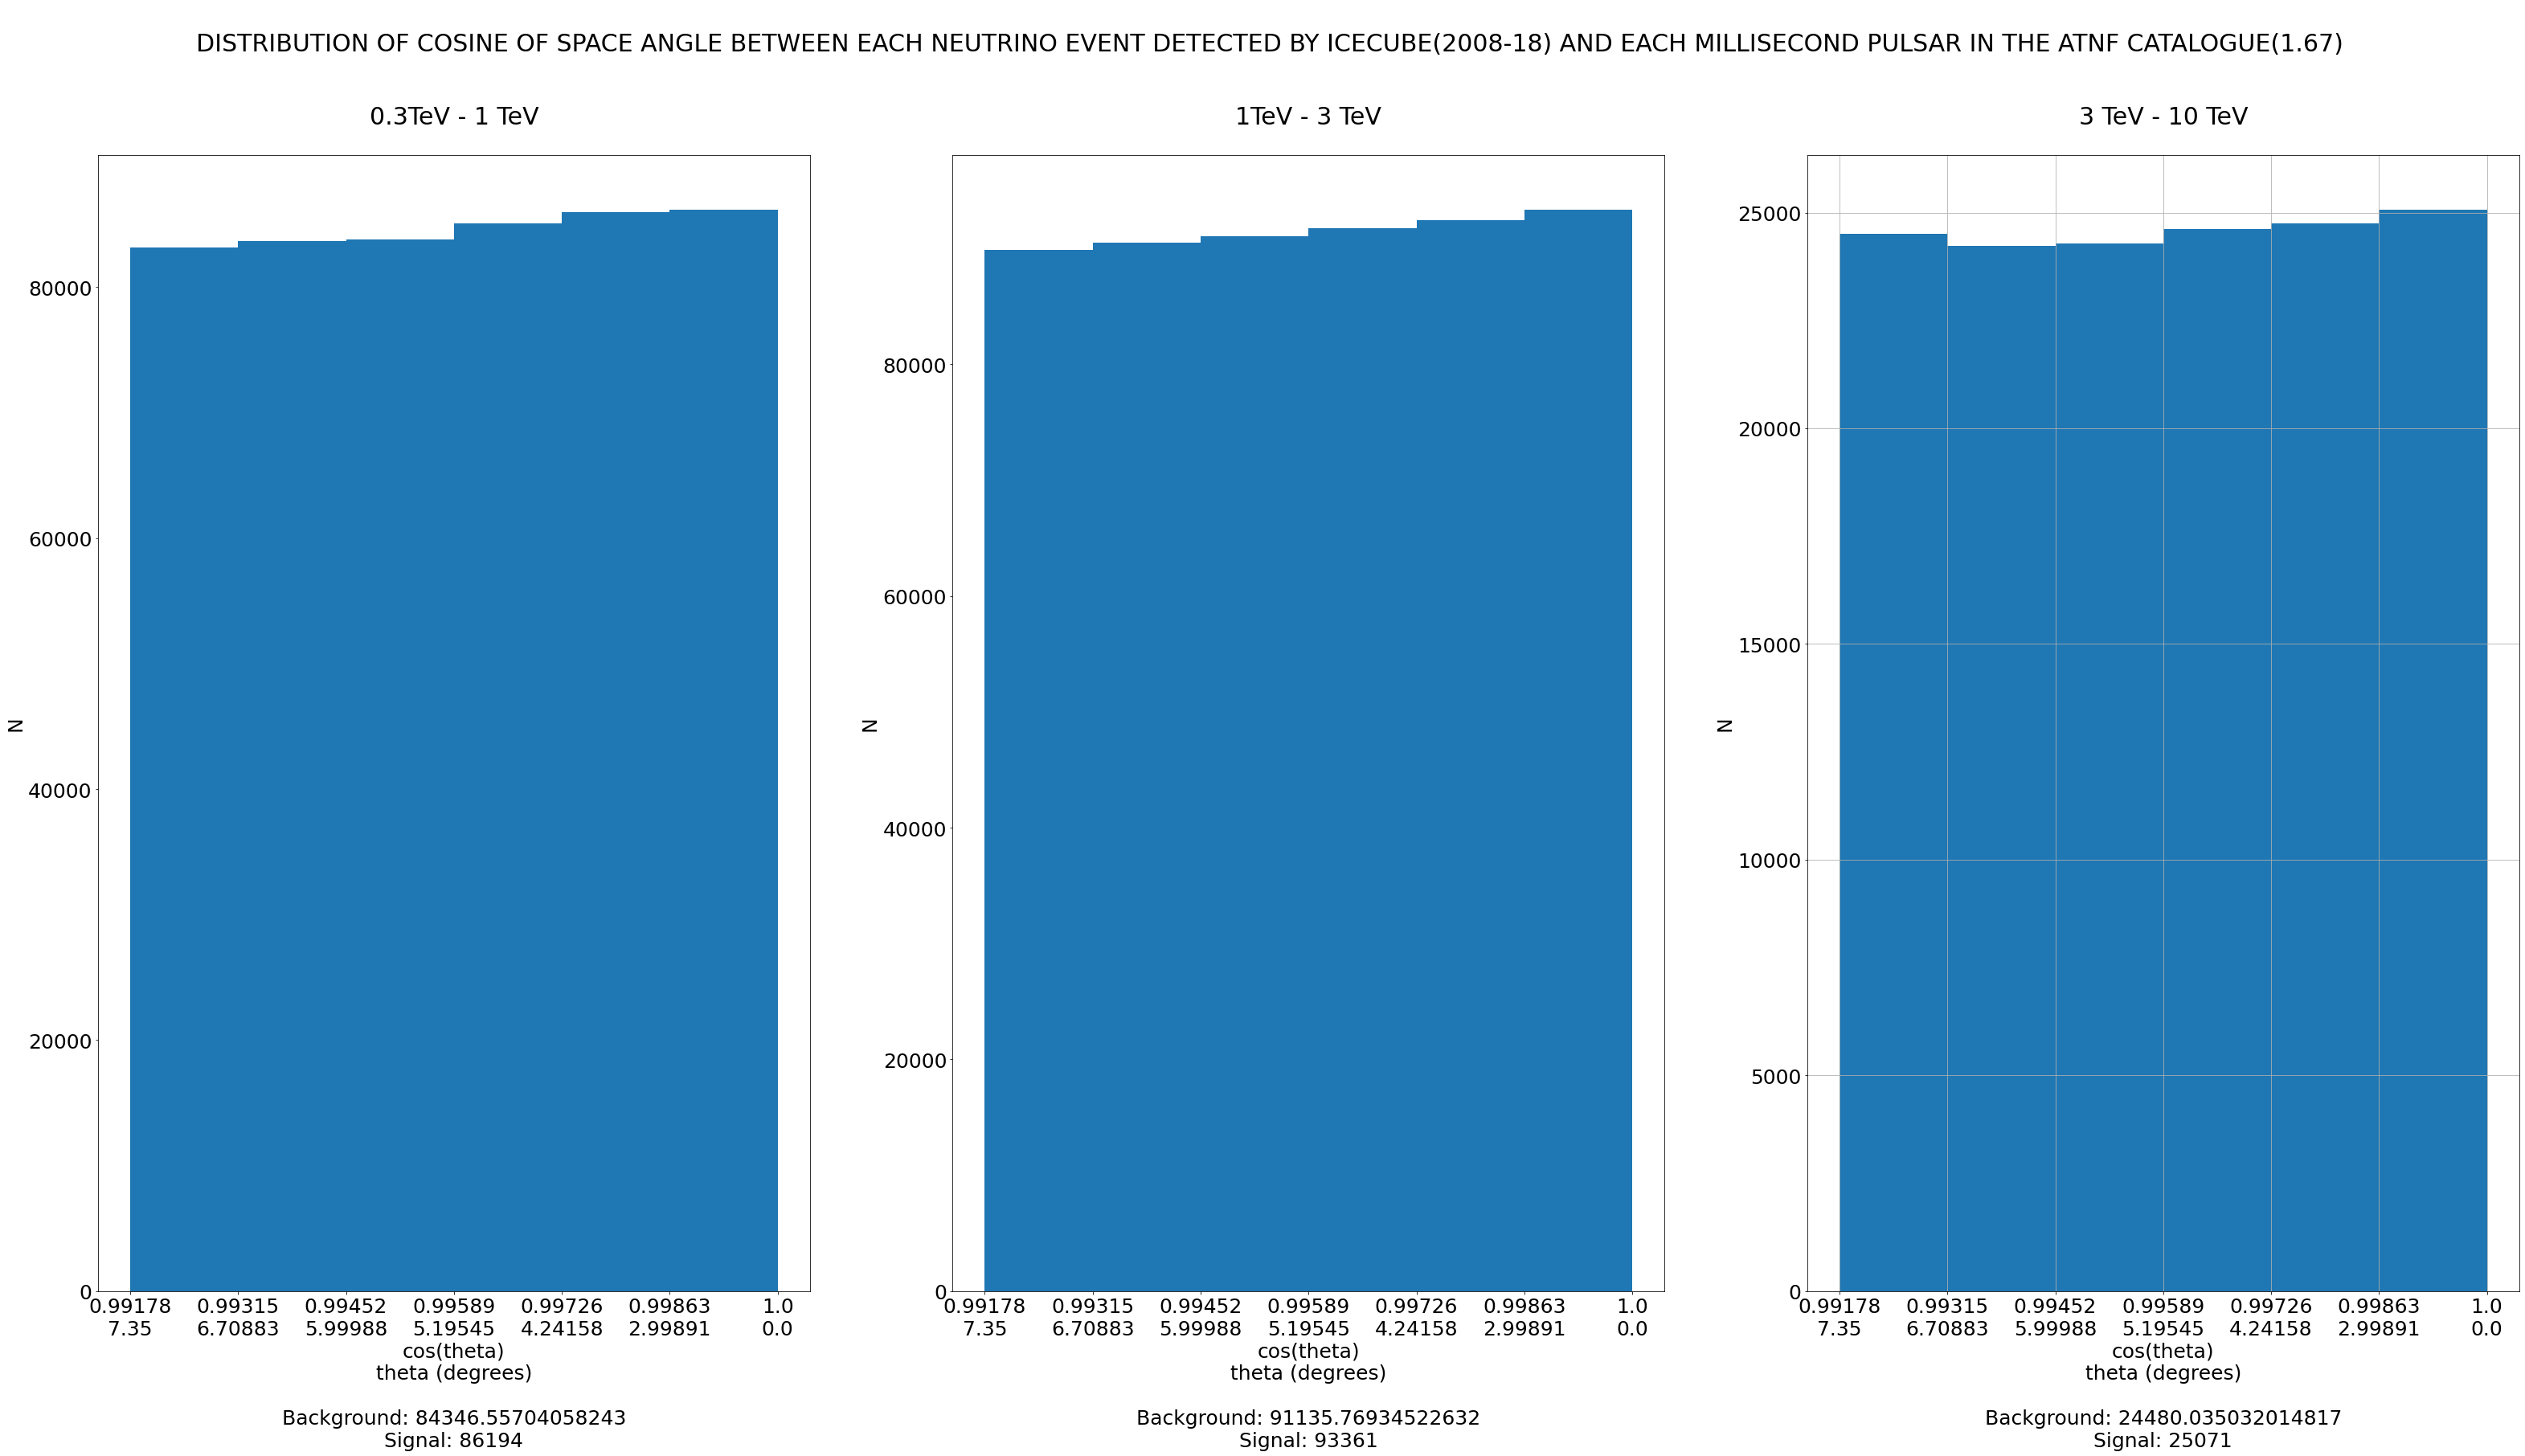

In [ ]:
fig, ax = plt.subplots(2, 3,  figsize=(54,26))
plt.rcParams.update({'font.size': 25})
plt.suptitle('\nDISTRIBUTION OF COSINE OF SPACE ANGLE BETWEEN EACH NEUTRINO EVENT DETECTED '
                                +'BY ICECUBE(2008-18) AND EACH MILLISECOND PULSAR IN THE ATNF CATALOGUE(1.67)\n\n')
nb = ['0.99178\n7.35', '0.99315\n6.70883', '0.99452\n5.99988', '0.99589\n5.19545', '0.99726\n4.24158', '0.99863\n2.99891', '1.0\n0.0']
#plt.hist(r, bins= nbins, edgecolor="black")

plt.setp(ax,ylabel="N")
for x in range(3):
    plt.setp(ax[x], xlabel = f"cos(theta)\ntheta (degrees)\n\nBackground: {mean[x]}\nSignal: {signal[x]}")
    plt.xticks(nbins, nb)
    ax[x].set_title(titles[x] + '\n')
    ax[x].set_xticks(nbins, nb)
    ax[x].stairs(freq[x], nbins, fill=True)  
    #ax[x].xticks(nbins, nb)
for x in range(3):
    plt.setp(ax[x], xlabel = f"cos(theta)\ntheta (degrees)\n\nBackground: {mean[x]}\nSignal: {signal[x]}")
    plt.xticks(nbins, nb)
    ax[x].set_title(titles[x] + '\n')
    ax[x].set_xticks(nbins, nb)
    ax[x].stairs(freq[x], nbins, fill=True)  

plt.grid(True, which="both")
#plt.show()

THE NEXT CELL CALCULATES THE HAVERSINE ANGLES (IN BATCHES) AND IF THAT ANGLE < ANG ERR i.e THE PULSAR IS IN THE NEIGHBOURHOOD OF THE NEUTRINO

THEN THE INDEX OF THAT PARTICULAR PULSAR AND NEUTRINO PAIR, ARE STORED IN THE LIST "r"

In [ ]:
ic[2]['AngErr[deg]']

0        0.20
1        0.21
2        0.51
3        0.60
4        0.31
         ... 
85587    0.20
85588    0.20
85589    2.09
85590    0.20
85591    1.06
Name: AngErr[deg], Length: 85592, dtype: object

In [ ]:
len(ft2a[0])/(441**2)

753.0

In [ ]:
ft2a[0][5]

108.1828926535031

In [ ]:
len(ft2a[0])/441

332073.0

In [ ]:
ic2c = ic

In [ ]:
#FOR 2D
def hvocos(lon1, lat1, lon2, lat2):

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    #dlat = np.subtract(lat2, lat1)
    #a = np.add(np.multiply(np.sin(lat1), np.sin(lat2)), np.multiply(np.multiply(np.cos(lat1), np.cos(lat2)), np.cos(dlon)))
    a = np.abs(np.subtract(np.add(np.multiply(np.sin(lat1), np.sin(lat2)), np.multiply(np.multiply(np.cos(lat1), np.cos(lat2)), np.cos(dlon))), cos5 * np.ones(len(lat1))))

    return a

#2D
def d2(icra, icdec):
    for k in range(lg):
        ilo = icra[k * p  :p * k + p]
        ila = icdec[k * p  :p * k + p]
        lo =[]
        la = []
        dcount = 0
        for j in range(p):#441
                    lo = [msra[(i + j)%p] for i in range(0,p)]
                    la = [msdec[(i + j)%p] for i in range(0,p)]
                    hvscos = hvocos(ilo, ila, lo, la)
                    lo = []
                    la = []
                    for l in range(p):
                        if hvscos[l] < canger[l]:
                            dcount+=1